In [1]:
from network import load_data_mnist, Network
import numpy as np
import matplotlib.pyplot as plt

In [67]:
train_data, train_class, test_data, test_class = load_data_mnist()

validation_percentage = 0.1
validation_size = int(len(train_data) * validation_percentage)
validation_data = train_data[..., :validation_size]
validation_class = train_class[..., :validation_size]
train_data = train_data[..., validation_size:]
train_class = train_class[..., validation_size:]

input_size = train_data.shape[0]
hidden_size = [500, 200, 100]
output_size = validation_class.shape[0]

optimizer = "adam"
epochs = 5
batch_size = 16
learning_rate = 2e-4
decay_rate = 0.01
enable_l2 = True

network = Network([input_size] + hidden_size + [output_size], optimizer) 
network.train(train_data, train_class, validation_data, validation_class, epochs, batch_size, learning_rate, decay_rate, enable_l2)
network.eval_network(test_data, test_class)


Log: initialized network with the adam optimizer, num. of hidden layers - 3 and sizes are [784, 500, 200, 100, 10]
Epoch0
Epoch 0 complete
Loss:1.4344723971801552
Validation Loss:0.21516273215979448
Classification accuracy: 0.9487179487179487
Epoch1
Epoch 1 complete
Loss:1.2910654234101249
Epoch2
Epoch 2 complete
Loss:1.3872057808714744
Epoch3
Epoch 3 complete
Loss:1.4905877489847137
Epoch4
Epoch 4 complete
Loss:1.5941547547007056
Validation Loss:0.12431735729982865
Classification accuracy: 0.9639


Evaluation on 10 random numbers with training losses

Validation Loss:0.12431735729982865
Classification accuracy: 0.9639


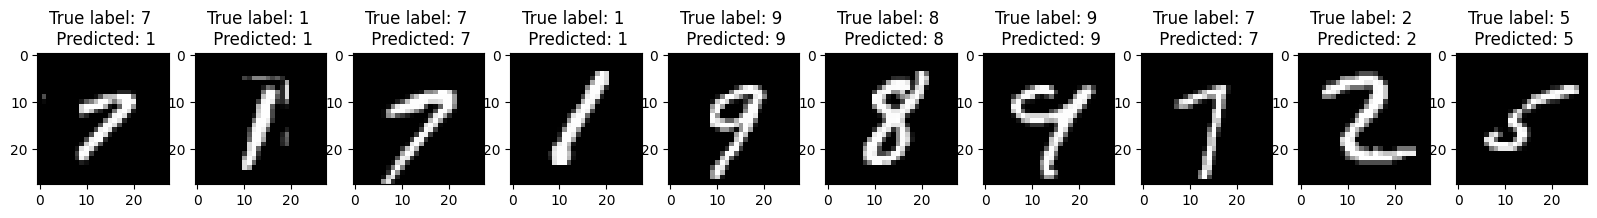

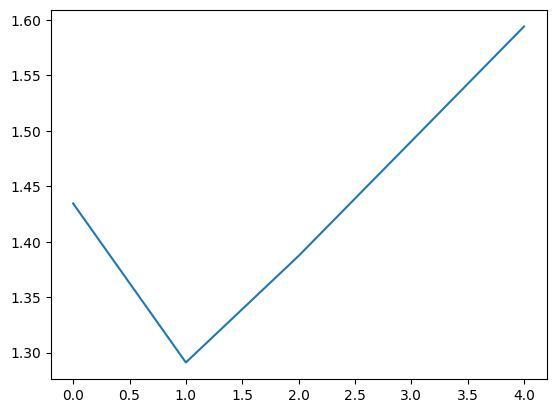

In [73]:
import random
network.eval_network(test_data, test_class)

num_images = 10
random_indices = random.sample(range(len(validation_data[0])), num_images)

fig, axs = plt.subplots(1, num_images, figsize=(20, 4))

for i, index in enumerate(random_indices):
    example = np.expand_dims(validation_data[:, index], -1)
    example_class = np.expand_dims(validation_class[:, index], -1)
    example_class_num = np.argmax(validation_class[:, index], axis=0)
    output, zs, activations = network.forward_pass(example)
    output_num = np.argmax(output, axis=0)[0]

    axs[i].imshow(example.reshape(28, 28), cmap='gray')
    axs[i].set_title(f"True label: {example_class_num} \n Predicted: {output_num}")

fig, ax = plt.subplots()
ax.plot(network.train_losses, label="train")
plt.show()
